<a href="https://colab.research.google.com/github/bjpark-forest/2023-1-Intro-DataScience/blob/main/13%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_9%EC%9E%A5_%5B%EB%82%A0%EC%94%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%5D_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀분석의 간단한 예제

In [ ]:
# 맷플롯 한글 폰트 깨짐 현상에 대한 해결 방법
# 1) 한글 폰트 설치
# 2) 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 3) 한글 폰트 읽어오기

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=10).get_name()

plt.rc('font', family=font_name)

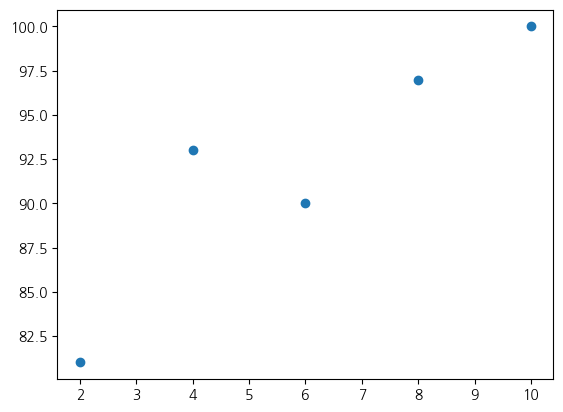

예상점수:[[94.3]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 공부시간 : 독립변수 / 시험점수 : 종속변수
x = [[2],[4],[6],[8],[10]]       # 공부시간
y = [[81],[93],[90],[97],[100]]  # 시험점수

# 산점도 그래프
plt.scatter(x,y)
plt.show()

# 학습시키기
model = LinearRegression()      # 선형회귀분석 객체 생성하기

# 선형회귀분석 객체를 이용하여 학습시키기
model.fit(x,y)

# 예측하기
result = model.predict([[7]])   # 7시간 학습
print(f'예상점수:{result}')

# [날씨데이터] 회귀분석 실습

## 단순선형회귀분석

In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
seoul = pd.read_excel('(2010-2020) weather.xlsx')
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [ ]:
seoul.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,4018.0,4018.000000,4018.000000,4017.000000
mean,108.0,12.965207,8.991015,17.699627
std,0.0,10.803691,10.932678,10.976719
min,108.0,-14.800000,-18.000000,-10.700000
25%,108.0,3.700000,-0.300000,8.200000
50%,108.0,14.250000,9.800000,19.600000
75%,108.0,22.800000,18.900000,27.400000
max,108.0,33.700000,30.300000,39.600000


In [ ]:
# 지점명 컬럼 삭제
seoul.drop('지점',axis=1,inplace=True)
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [ ]:
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [ ]:
# 컬럼명 변경
seoul.columns=['날짜','평균기온','최저기온','최고기온']
seoul.columns

Index(['날짜', '평균기온', '최저기온', '최고기온'], dtype='object')

In [ ]:
seoul.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    1
dtype: int64

In [ ]:
# 누락 데이터 행을 삭제하기
seoul.dropna(subset=['최고기온'],axis=0,inplace=True)

In [ ]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017 entries, 0 to 4017
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 156.9 KB


In [ ]:
# 컬럼추가
seoul['년도']=seoul['날짜'].dt.year
seoul['월']=seoul['날짜'].dt.month
seoul['일']=seoul['날짜'].dt.day
seoul.head()

,날짜,평균기온,최저기온,최고기온,년도
0,2010-01-01,-7.6,-12.7,-3.6,2010
1,2010-01-02,-3.6,-7.4,0.2,2010
2,2010-01-03,-6.8,-10.5,-3.2,2010
3,2010-01-04,-5.9,-8.0,-3.4,2010
4,2010-01-05,-9.9,-12.3,-7.0,2010


In [ ]:
# 데이터분석에 사용할 데이터 필터링
conditions=(seoul['날짜'].dt.month==8) & (seoul['날짜'].dt.day==15)
seoul0815=seoul[conditions]
seoul0815

,날짜,평균기온,최저기온,최고기온,년도
226,2010-08-15,26.6,24.6,30.2,2010
591,2011-08-15,24.5,22.9,26.9,2011
957,2012-08-15,23.7,22.4,27.1,2012
1322,2013-08-15,28.7,25.8,32.4,2013
1687,2014-08-15,24.9,20.9,29.6,2014
2052,2015-08-15,27.1,23.1,30.8,2015
2418,2016-08-15,29.1,25.8,34.0,2016
2783,2017-08-15,21.9,20.8,24.0,2017
3148,2018-08-15,31.7,28.3,38.0,2018
3513,2019-08-15,25.9,23.9,28.6,2019


In [ ]:
seoul0815.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 226 to 3879
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      11 non-null     datetime64[ns]
 1   평균기온    11 non-null     float64       
 2   최저기온    11 non-null     float64       
 3   최고기온    11 non-null     float64       
 4   년도      11 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 528.0 bytes


In [ ]:
# 결측값 처리
seoul0815.isnull().sum()

날짜      0
평균기온    0
최저기온    0
최고기온    0
년도      0
dtype: int64

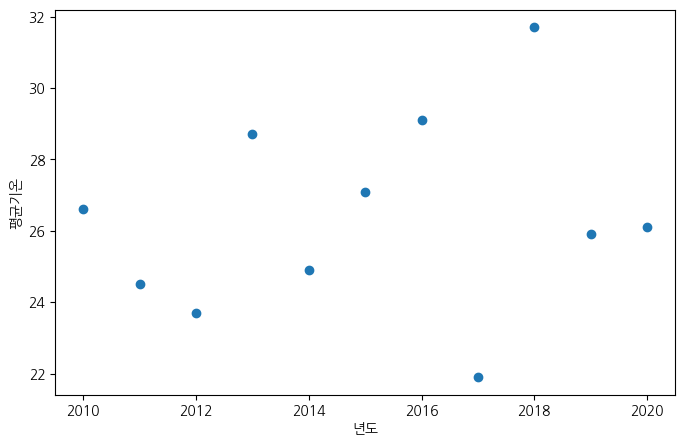

In [ ]:
# 년도, 평균기온 산점도 그리기
plt.figure(figsize=(8,5))
X = seoul0815[['년도']]
Y = seoul0815['평균기온']
plt.scatter(X,Y)
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.show()

In [ ]:
# 단순선형회귀분석 : 2022년 08월15일 기온예측하기
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
X = seoul0815[['년도']]
Y = seoul0815['평균기온']
model.fit(X, Y)                  #  LinearRegression 모델 생성, 그 안에 X, Y 데이터 fit 
X_predict = pd.DataFrame([[2022]], columns=['년도'])
result = model.predict(X_predict) # [27.50818182] 예측된 값
print(result)   

[27.50818182]


In [ ]:
seoul0815.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 226 to 3879
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      11 non-null     datetime64[ns]
 1   평균기온    11 non-null     float64       
 2   최저기온    11 non-null     float64       
 3   최고기온    11 non-null     float64       
 4   년도      11 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 828.0 bytes


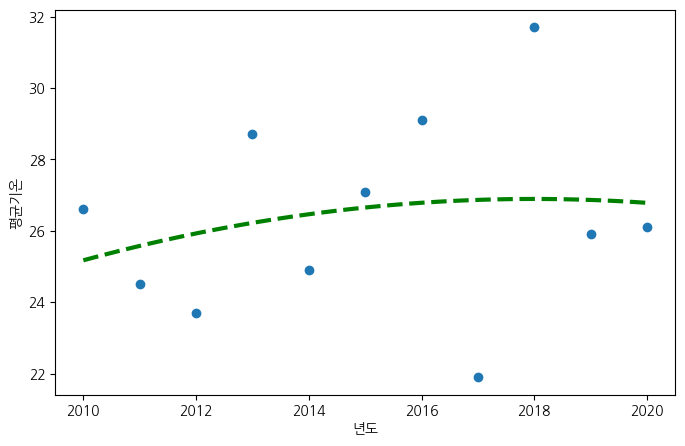

In [ ]:
# 08월15일 평균기온을 산점도, 회귀선 출력하기
x=seoul0815['년도']
y=seoul0815['평균기온']

fp1 = np.polyfit(x, y, 2)   # 2차 방정식의 계수(a,b,c)구함
f1 = np.poly1d(fp1)         # 위 계수들로 2차 방정식을 생성
fx = np.linspace(2010, 2020)

plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

plt.xlabel('년도')
plt.ylabel('평균기온')
plt.show()



>> 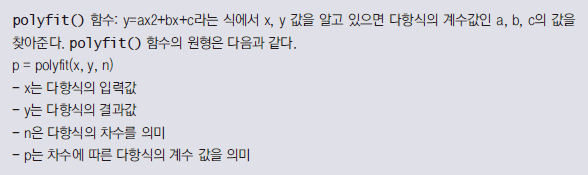



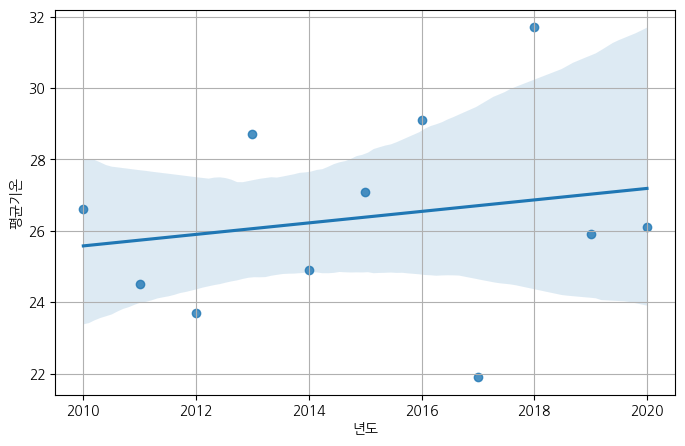

In [ ]:
# 시본 모듈로 추세선 넣기
plt.figure(figsize=(8, 5))
sns.regplot(x='년도', y='평균기온', data=seoul0815) 
plt.grid()
plt.show()

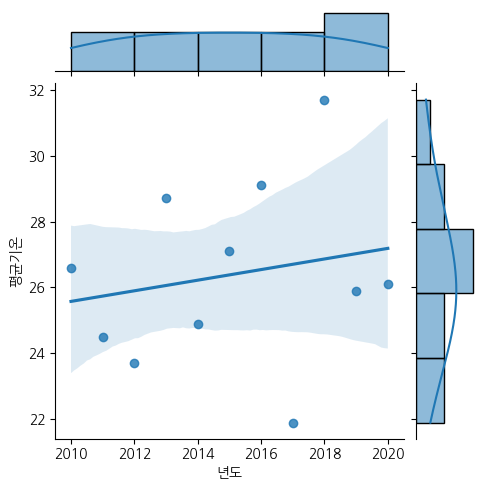

In [ ]:
sns.jointplot(x='년도', y='평균기온', data=seoul0815, kind='reg', height=5)
plt.show()

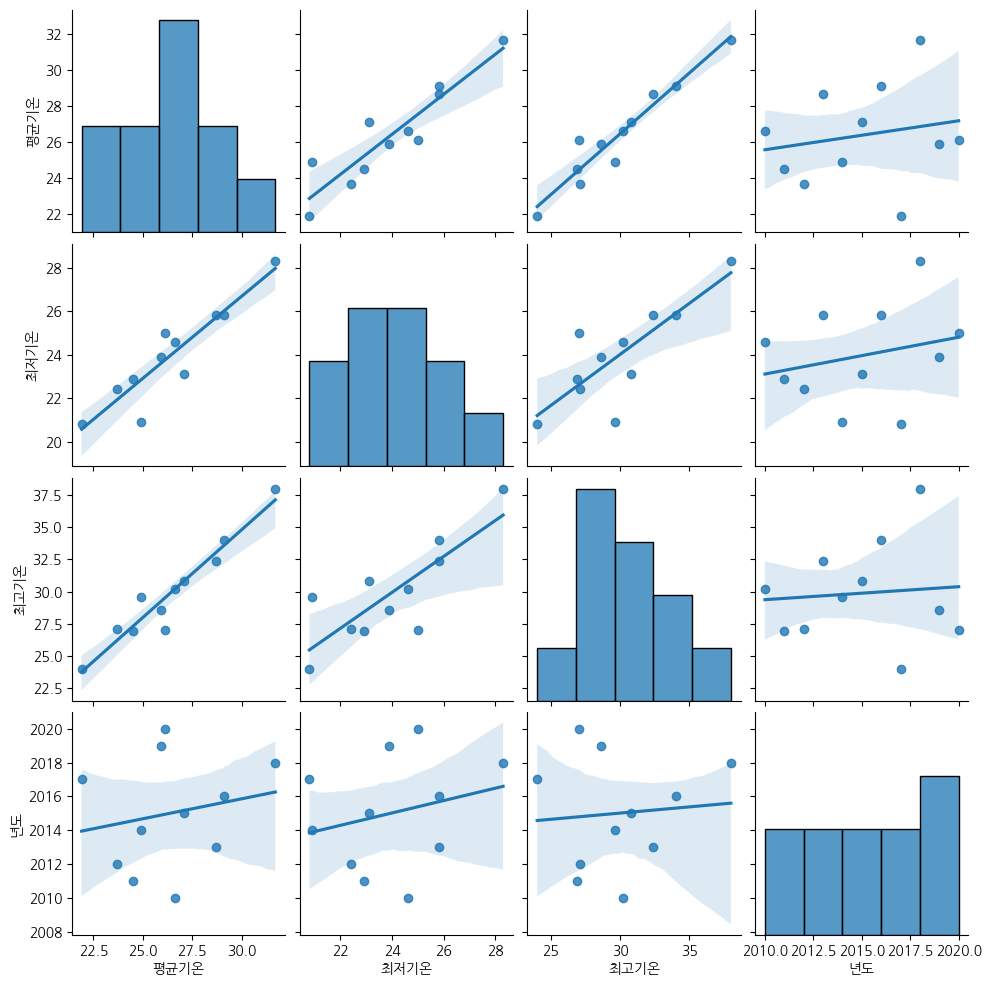

In [ ]:
sns.pairplot(seoul0815, kind='reg', height=2.5)
plt.show()

## 다중회귀분석

In [ ]:
seoul.info()
seoul.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4017 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      4017 non-null   datetime64[ns]
 1   평균기온    4017 non-null   float64       
 2   최저기온    4017 non-null   float64       
 3   최고기온    4017 non-null   float64       
 4   년도      4017 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 188.3 KB


,날짜,평균기온,최저기온,최고기온,년도
0,2010-01-01,-7.6,-12.7,-3.6,2010
1,2010-01-02,-3.6,-7.4,0.2,2010
2,2010-01-03,-6.8,-10.5,-3.2,2010
3,2010-01-04,-5.9,-8.0,-3.4,2010
4,2010-01-05,-9.9,-12.3,-7.0,2010


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = seoul0815[['년도','최저기온','최고기온']]
Y = seoul0815['평균기온']

model.fit(X, Y)
X_predict = pd.DataFrame([['2022',24,33]], columns=['년도','최저기온','최고기온'])
result = model.predict(X_predict)       # 2022년, 최저기온, 최고기온
print(result)                           # [28.08381871] # 평균기온 예측

[28.08381871]


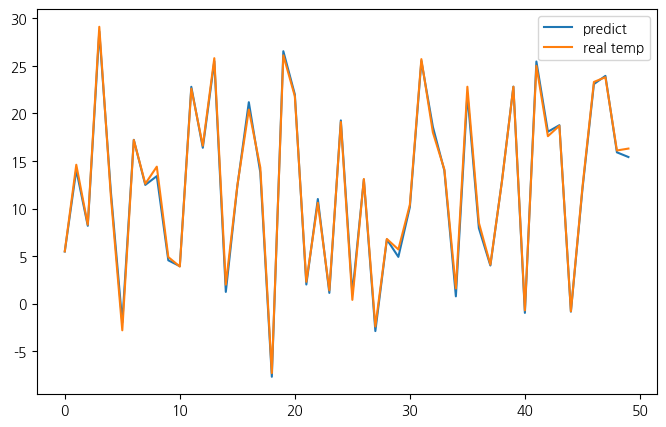

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.figure(figsize=(8,5))

# 데이터 준비 : 속성(변수) 2가지 선택
X = seoul[['년도','최저기온','최고기온']]
Y = seoul['평균기온']

# 먼저 X와 Y변수를 받아 사이킷런의 train_test_split함수를 통해 7:3의 비율로 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

#다중 선형 회귀 모델 생성
model = LinearRegression()
model.fit(x_train, y_train)

# 모델 테스트 : test셋의 일부 데이터로 모델의 예측결과 성능 확인
plt.plot(model.predict(x_test[:50]), label='predict')
plt.plot(y_test[:50].values.reshape(-1, 1), label='real temp')  
#reshape(-1, 1)은 1차원 배열을 2차월 배열로 변환, (10,) 형태의 1차원 배열의 경우 (10, 1) 형태의 2차원 배열로 변환

plt.rcParams['axes.unicode_minus']=False
plt.legend()
plt.show()

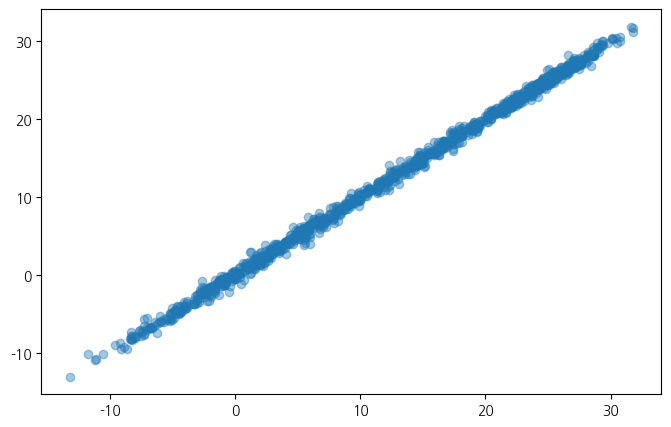

In [ ]:
# 전체 데이터를 이용해 값을 예측하고 실제 값과 비교하여 산점도 그리기
plt.figure(figsize=(8,5))
y_predict = model.predict(x_test)

plt.scatter(y_test, y_predict, alpha = 0.4)
plt.rcParams['axes.unicode_minus']=False
plt.show()

In [ ]:
# score 메소드를 통해 다중선형회귀 모델의 성능을 측정

print(model.score(x_train,y_train))

0.9976977104781903


⇒ 결정계수 R²의 최댓값은 1이며, 이 수치가 클수록 실제값과 예측값이 유사함을 의미
- 위에서 모델링한 다중선형회귀모델은 약 0.99의 결정계수를 가지며,
- 이는 X변수들이 Y변수에 미치는 영향이 99%로, X변수들이 평균기온값 변동의 99%를 설명할 수 있음